In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})
sns.set_palette("Set1", 8, .75)
sns.set()
random.seed(30)

In [2]:
data_path = 'radiomic.csv'
df = pd.read_csv(data_path)
df

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient,disease
0,1.188696,2.372984,8460.498535,-3.203427e-16,0.475326,4.466517,3.597554,0.371204,1.930298,2.026560,...,-3.203427e-16,0.000472,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000,0.000000,[['98472']],3
1,-0.198494,0.891536,1533.403584,7.591312e-01,0.520740,14.456129,4.923942,0.374042,0.327296,0.260775,...,3.235926e+00,0.003779,4.390594e+05,49.512876,0.007527,0.071721,0.012265,0.007538,[['MR048994B']],2
2,0.489277,2.205282,6470.934679,1.656349e-01,0.886448,2.892500,2.926348,0.515566,1.475725,1.603291,...,3.121928e+00,0.004005,5.311234e+05,6.216520,0.041745,0.019187,0.000487,0.039200,[['112074']],3
3,0.839421,2.518100,4531.267991,-3.203427e-16,0.893965,2.339229,3.125282,0.502674,1.702676,1.723932,...,-3.203427e-16,0.000723,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000,0.000000,[['90284']],2
4,0.384813,1.523654,9352.132334,2.317849e-02,0.583373,4.357846,3.265800,0.355696,0.926407,0.868522,...,2.521641e+00,0.000793,9.483888e+06,3.758426,0.066744,0.003396,0.000008,0.067475,[['MR029209I']],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,0.276978,1.636446,15188.938602,8.080487e-02,0.551921,3.318225,3.331909,0.390929,1.037245,1.052572,...,3.022055e+00,0.001062,9.539203e+06,14.408057,0.017616,0.010049,0.000103,0.016974,[['MR017260F']],2
3060,0.205214,2.565832,3655.407485,2.368685e-01,1.330289,2.546688,3.676741,0.727518,1.228434,1.104603,...,2.807355e+00,0.004383,2.847016e+05,7.104273,0.037366,0.033516,0.001244,0.037579,[['MR054875']],2
3061,0.521787,1.741757,4772.227578,9.535648e-03,0.653264,2.699510,2.570236,0.375097,1.043958,0.951075,...,1.584963e+00,0.000815,3.005335e+06,0.632664,0.395638,0.001373,0.000001,0.378976,[['103148']],2
3062,0.438975,0.824124,149.530644,-3.203427e-16,0.156248,11.597860,1.821742,0.149127,0.614326,0.551451,...,-3.203427e-16,0.002907,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000,0.000000,[['MR053110B']],2


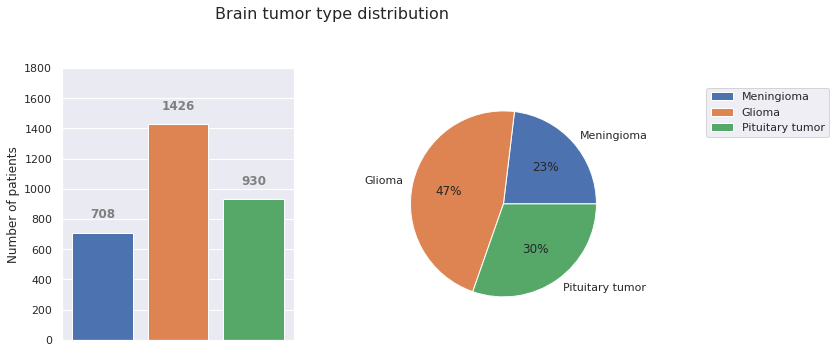

In [3]:
tumors_type = {'1': 'Meningioma', '2': 'Glioma', '3': 'Pituitary tumor'}
labels, counts = np.unique(df['disease'], return_counts=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot frequency
ax[0].bar(labels[0], counts[0], label=tumors_type[str(labels[0])])
ax[0].bar(labels[1], counts[1], label=tumors_type[str(labels[1])])
ax[0].bar(labels[2], counts[2], label=tumors_type[str(labels[2])])
ax[0].set_ylabel('Number of patients')
ax[0].axes.get_xaxis().set_ticks([])
ax[0].set_ylim([0, 1800])

for i in ax[0].patches:
    height = i.get_height()
    ax[0].text((i.get_x() + i.get_width()/2.0), height + 100, str(i.get_height()), ha='center',
            fontsize=12, fontweight='bold', color='grey')

#create pie chart
colors = sns.color_palette('pastel')[0:2]
ax[1].pie(counts, labels = tumors_type.values(), autopct='%.0f%%')
ax[1].legend(bbox_to_anchor=(1.9, 1), loc='upper right', borderaxespad=0)

fig.suptitle("Brain tumor type distribution", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [4]:
x = df.drop(['disease','patient'], axis=1)
x = StandardScaler().fit_transform(x)

y = df['disease']

print(x.shape)
print(y.shape)

(3064, 93)
(3064,)


In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

df_PCA = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])

print(df_PCA.shape)
print(len(df['disease']))

df_PCA = pd.concat([df_PCA, df[['disease']]], axis = 1)
df_PCA.head(5)


(3064, 2)
3064


,PCA1,PCA2,disease
0,-6.740276,4.830538,3
1,14.028959,3.777045,2
2,2.215991,-1.388783,3
3,-6.296563,5.307758,2
4,-1.857875,-4.983432,2


In [6]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

df_tsn = pd.DataFrame(data = tsne_results, columns = ['T-SNE-1', 'T-SNE-2'])

print(df_tsn.shape)
print(len(df['disease']))

finalDf = pd.concat([df_PCA, df_tsn], axis = 1)
finalDf.head(5)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3064 samples in 0.002s...


/home/hugo/anaconda3/envs/radiomic/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hugo/anaconda3/envs/radiomic/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 3064 samples in 0.358s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3064
[t-SNE] Computed conditional probabilities for sample 2000 / 3064
[t-SNE] Computed conditional probabilities for sample 3000 / 3064
[t-SNE] Computed conditional probabilities for sample 3064 / 3064
[t-SNE] Mean sigma: 1.758176
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.683228
[t-SNE] KL divergence after 300 iterations: 1.588854
(3064, 2)
3064


,PCA1,PCA2,disease,T-SNE-1,T-SNE-2
0,-6.740276,4.830538,3,1.004848,-12.125641
1,14.028959,3.777045,2,14.142220,0.910639
2,2.215991,-1.388783,3,1.196581,-0.315539
3,-6.296563,5.307758,2,2.621164,-13.128688
4,-1.857875,-4.983432,2,-3.423394,10.033858


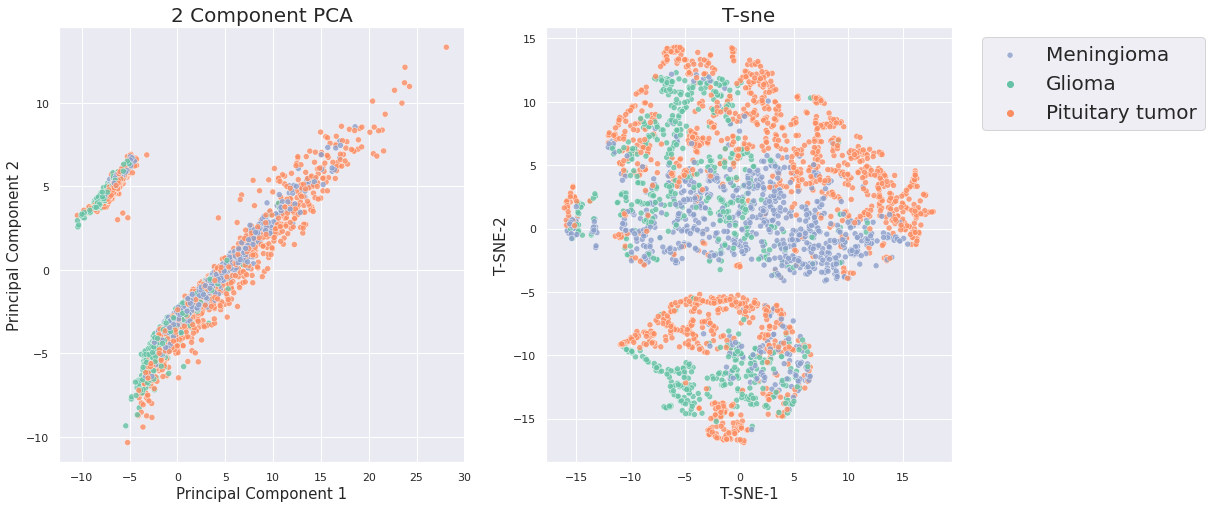

In [7]:
plt.figure(figsize=(16,8))

# set color
tumors_type = {'1': 'Meningioma', '2': 'Glioma', '3': 'Pituitary tumor'} 
color_dict = {1: '#1f77b4', 2: '#ff7f0e', 3: '#2ca02c'}
color_dict = {1: 'b', 2: 'g', 3: 'r'}

ax1 = plt.subplot(1, 2, 1)
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)

sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="disease",
    data=finalDf,
    palette='Set2', 
    alpha=0.8,
    legend=None,
    ax=ax1)

ax2 = plt.subplot(1, 2, 2)
ax2.set_xlabel('T-SNE-1', fontsize = 15)
ax2.set_ylabel('T-SNE-2', fontsize = 15)
ax2.set_title('T-sne', fontsize = 20)

sns.scatterplot(
    x="T-SNE-1", y="T-SNE-2",
    hue="disease",
    data=finalDf,
    palette='Set2', 
    alpha=0.8,
    ax=ax2)

handles, labels  =  ax2.get_legend_handles_labels()
tumors_labels = [tumors_type[label] for label in labels]
plt.legend(tumors_labels, bbox_to_anchor=(1.05, 1), loc=2, fontsize = 20)
plt.show()